In [ ]:
# prompt: mouny MyDrive

from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_spectrogram(y):
  spec = librosa.feature.melspectogram(y=y)
  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv

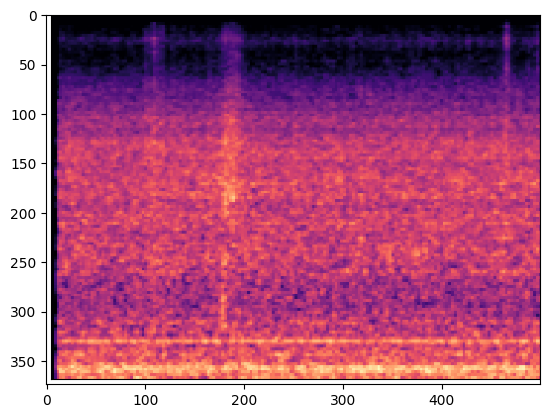

In [ ]:

import matplotlib.pyplot as plt


image_path = "/content/drive/MyDrive/spectrograms/0/100852-0-0-0.png"


image = plt.imread(image_path)


plt.imshow(image)
plt.show()


In [ ]:
pip install numpy matplotlib opencv-python


In [ ]:
import os
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
dataPath = '/content/drive/MyDrive/spectrograms'
data = []

In [ ]:
for classLabel in range(10):
  classPath = os.path.join(dataPath, str(classLabel))
  for imageName in os.listdir(classPath):
    if imageName.endswith(".png"):
      imgPath = os.path.join(classPath,imageName)
      image = cv.imread(imgPath,cv.IMREAD_GRAYSCALE)
      image = cv.resize(image , (128,128))
      image = image / 255
      data.append([image,classLabel])


In [ ]:
trainSet, testSet = train_test_split(data,test_size = 0.2, random_state = 42)
trainSet, valSet = train_test_split(trainSet, test_size = 0.1, random_state = 42)

X_train, y_train = zip(*trainSet)
X_val, y_val = zip(*valSet)
X_test, y_test = zip(*testSet)

np.save("X_train.npy", np.array(X_train))
np.save("y_train.npy", np.array(y_train))
np.save("X_val.npy", np.array(X_val))
np.save("y_val.npy", np.array(y_val))
np.save("X_test.npy", np.array(X_test))
np.save("y_test.npy", np.array(y_test))

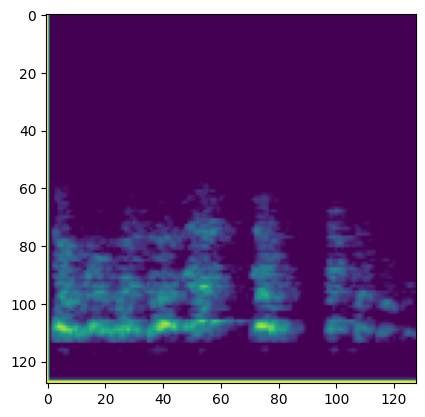

In [ ]:
loaded_array = np.load("X_train.npy")


image_index = 4
selected_image = loaded_array[image_index]

plt.imshow(selected_image)

Epoch 1/10
197/197 [==============================] - 157s 787ms/step - loss: 1.2497 - accuracy: 0.5705 - val_loss: 0.9075 - val_accuracy: 0.7082
Epoch 2/10
197/197 [==============================] - 158s 805ms/step - loss: 0.6653 - accuracy: 0.7797 - val_loss: 0.7173 - val_accuracy: 0.7611
Epoch 3/10
197/197 [==============================] - 169s 859ms/step - loss: 0.4176 - accuracy: 0.8633 - val_loss: 0.5342 - val_accuracy: 0.8312
Epoch 4/10
197/197 [==============================] - 155s 787ms/step - loss: 0.2471 - accuracy: 0.9174 - val_loss: 0.5509 - val_accuracy: 0.8355
Epoch 5/10
197/197 [==============================] - 158s 803ms/step - loss: 0.1270 - accuracy: 0.9591 - val_loss: 0.6534 - val_accuracy: 0.8312
Epoch 6/10
197/197 [==============================] - 155s 786ms/step - loss: 0.0940 - accuracy: 0.9701 - val_loss: 0.7282 - val_accuracy: 0.8326
Epoch 7/10
197/197 [==============================] - 159s 806ms/step - loss: 0.0735 - accuracy: 0.9796 - val_loss: 0.7287 -

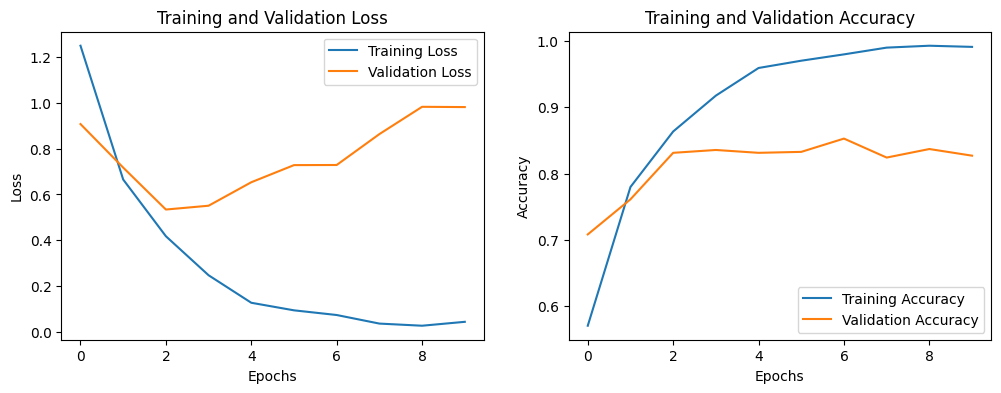

55/55 [==============================] - 11s 203ms/step - loss: 0.8158 - accuracy: 0.8466
Test Loss: 0.8158010244369507
Test Accuracy: 0.8465941548347473


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_val), np.array(y_val)))


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/8
197/197 [==============================] - 58s 290ms/step - loss: 1.8801 - accuracy: 0.5095 - val_loss: 1.3121 - val_accuracy: 0.6366
Epoch 2/8
197/197 [==============================] - 54s 272ms/step - loss: 1.1038 - accuracy: 0.7071 - val_loss: 1.0771 - val_accuracy: 0.6981
Epoch 3/8
197/197 [==============================] - 55s 282ms/step - loss: 0.8558 - accuracy: 0.7795 - val_loss: 1.0806 - val_accuracy: 0.6867
Epoch 4/8
197/197 [==============================] - 55s 280ms/step - loss: 0.6965 - accuracy: 0.8256 - val_loss: 0.9726 - val_accuracy: 0.7139
Epoch 5/8
197/197 [==============================] - 55s 279ms/step - loss: 0.5283 - accuracy: 0.8743 - val_loss: 0.9328 - val_accuracy: 0.7325
Epoch 6/8
197/197 [==============================] - 54s 274ms/step - loss: 0.4132 - accuracy: 0.9112 - val_loss: 0.9556 - val_accuracy: 0.7611
Epoch 7/8
197/197 [==============================] - 62s 314ms/step - loss: 0.3155 - accuracy: 0.9443 - val_loss: 0.9945 - val_accuracy:

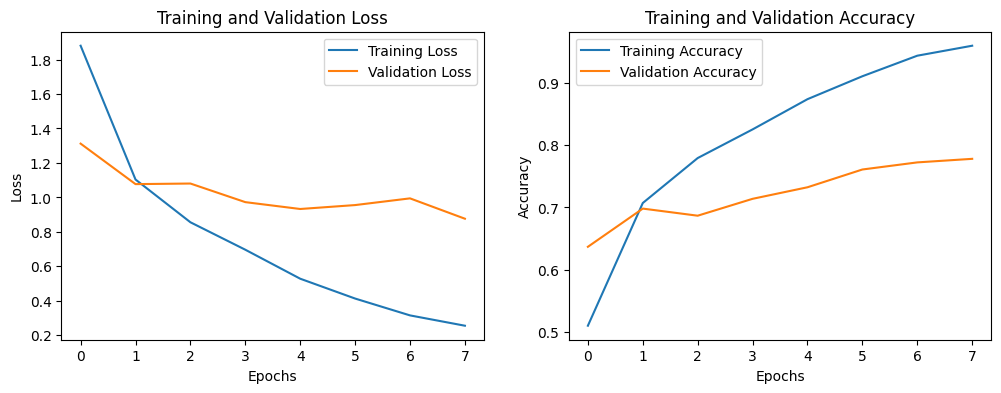

55/55 [==============================] - 5s 89ms/step - loss: 0.8966 - accuracy: 0.7979
Test Loss: 0.8965549468994141
Test Accuracy: 0.7979393005371094


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras import regularizers


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

n
model.compile(optimizer=Adam(learning_rate=0.0011),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=8,  # Epoch sayısı
                    batch_size=32,  # Batch size
                    validation_data=(np.array(X_val), np.array(y_val)),
                    verbose=1)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/13
197/197 [==============================] - 53s 264ms/step - loss: 1.8562 - accuracy: 0.5154 - val_loss: 1.3272 - val_accuracy: 0.6381
Epoch 2/13
197/197 [==============================] - 55s 278ms/step - loss: 1.1253 - accuracy: 0.6895 - val_loss: 1.0978 - val_accuracy: 0.7039
Epoch 3/13
197/197 [==============================] - 53s 268ms/step - loss: 0.8996 - accuracy: 0.7607 - val_loss: 0.9435 - val_accuracy: 0.7525
Epoch 4/13
197/197 [==============================] - 59s 300ms/step - loss: 0.7360 - accuracy: 0.8112 - val_loss: 0.9353 - val_accuracy: 0.7225
Epoch 5/13
197/197 [==============================] - 55s 278ms/step - loss: 0.6158 - accuracy: 0.8521 - val_loss: 0.8942 - val_accuracy: 0.7597
Epoch 6/13
197/197 [==============================] - 54s 273ms/step - loss: 0.4985 - accuracy: 0.8867 - val_loss: 0.9192 - val_accuracy: 0.7339
Epoch 7/13
197/197 [==============================] - 54s 276ms/step - loss: 0.4109 - accuracy: 0.9141 - val_loss: 0.8852 - val_ac

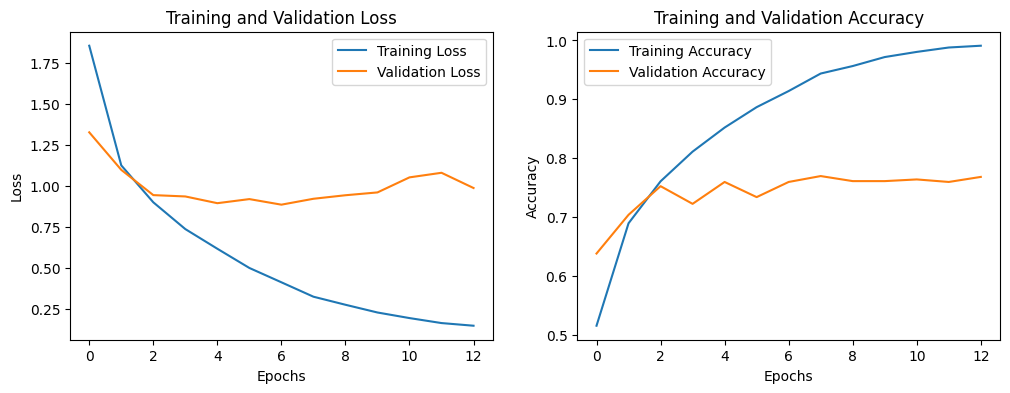

55/55 [==============================] - 5s 84ms/step - loss: 0.9898 - accuracy: 0.7853
Test Loss: 0.9897716045379639
Test Accuracy: 0.7853463292121887


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.0011),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=13,
                    batch_size=32,
                    validation_data=(np.array(X_val), np.array(y_val)),
                    verbose=1)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/12
197/197 [==============================] - 100s 503ms/step - loss: 3.8772 - accuracy: 0.4451 - val_loss: 1.3770 - val_accuracy: 0.6624
Epoch 2/12
197/197 [==============================] - 99s 504ms/step - loss: 3.0123 - accuracy: 0.5921 - val_loss: 1.5984 - val_accuracy: 0.6681
Epoch 3/12
197/197 [==============================] - 104s 528ms/step - loss: 2.4844 - accuracy: 0.6473 - val_loss: 1.5619 - val_accuracy: 0.7411
Epoch 4/12
197/197 [==============================] - 98s 500ms/step - loss: 2.0488 - accuracy: 0.6884 - val_loss: 1.5102 - val_accuracy: 0.7954
Epoch 5/12
197/197 [==============================] - 101s 512ms/step - loss: 1.6964 - accuracy: 0.7179 - val_loss: 1.7260 - val_accuracy: 0.7797
Epoch 6/12
197/197 [==============================] - 103s 523ms/step - loss: 1.5633 - accuracy: 0.7283 - val_loss: 1.7414 - val_accuracy: 0.8097
Epoch 7/12
197/197 [==============================] - 99s 504ms/step - loss: 1.4294 - accuracy: 0.7396 - val_loss: 1.9216 - va

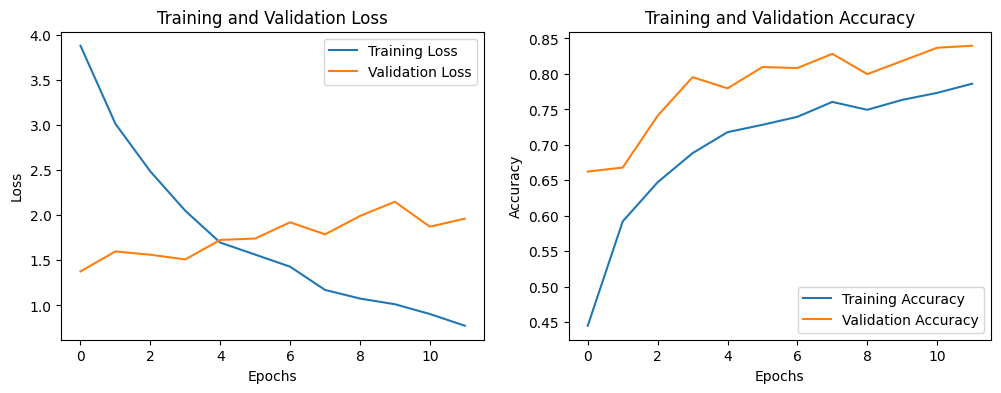

55/55 [==============================] - 8s 137ms/step - loss: 1.7266 - accuracy: 0.8506
Test Loss: 1.7265918254852295
Test Accuracy: 0.8506010174751282


In [ ]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.add(Dropout(0.2))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=12,
                    batch_size=32,
                    validation_data=(np.array(X_val), np.array(y_val)),
                    verbose=1)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/18
197/197 [==============================] - 103s 517ms/step - loss: 3.8653 - accuracy: 0.4543 - val_loss: 1.6565 - val_accuracy: 0.6094
Epoch 2/18
197/197 [==============================] - 99s 505ms/step - loss: 3.0310 - accuracy: 0.5912 - val_loss: 1.5291 - val_accuracy: 0.7067
Epoch 3/18
197/197 [==============================] - 96s 488ms/step - loss: 2.4531 - accuracy: 0.6564 - val_loss: 1.7506 - val_accuracy: 0.7353
Epoch 4/18
197/197 [==============================] - 104s 529ms/step - loss: 2.1411 - accuracy: 0.6726 - val_loss: 1.4038 - val_accuracy: 0.7969
Epoch 5/18
197/197 [==============================] - 100s 509ms/step - loss: 1.8451 - accuracy: 0.7076 - val_loss: 1.6981 - val_accuracy: 0.7783
Epoch 6/18
197/197 [==============================] - 102s 517ms/step - loss: 1.5718 - accuracy: 0.7216 - val_loss: 1.7605 - val_accuracy: 0.8026
Epoch 7/18
197/197 [==============================] - 101s 511ms/step - loss: 1.3427 - accuracy: 0.7409 - val_loss: 1.8422 - v

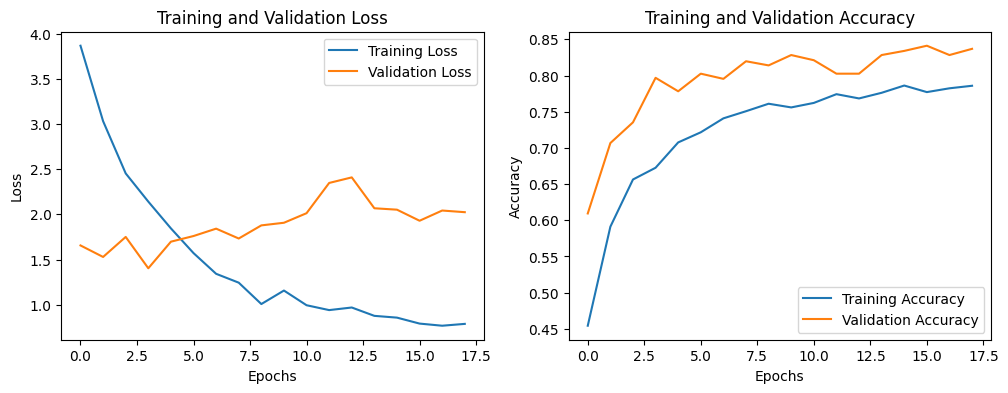

55/55 [==============================] - 8s 140ms/step - loss: 1.7254 - accuracy: 0.8535
Test Loss: 1.7254352569580078
Test Accuracy: 0.8534630537033081


In [ ]:
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.add(Dropout(0.2))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=18,
                    batch_size=32,
                    validation_data=(np.array(X_val), np.array(y_val)),
                    verbose=1)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/12
197/197 [==============================] - 185s 935ms/step - loss: 7.9516 - accuracy: 0.1659 - val_loss: 13.4167 - val_accuracy: 0.1588
Epoch 2/12
197/197 [==============================] - 177s 901ms/step - loss: 7.5524 - accuracy: 0.1788 - val_loss: 11.8525 - val_accuracy: 0.2647
Epoch 3/12
197/197 [==============================] - 176s 892ms/step - loss: 7.7188 - accuracy: 0.1567 - val_loss: 12.1511 - val_accuracy: 0.2461
Epoch 4/12
197/197 [==============================] - 178s 905ms/step - loss: 7.4739 - accuracy: 0.1688 - val_loss: 12.5114 - val_accuracy: 0.2232
Epoch 5/12
197/197 [==============================] - 192s 976ms/step - loss: 7.3372 - accuracy: 0.1745 - val_loss: 12.3595 - val_accuracy: 0.2332
Epoch 6/12
197/197 [==============================] - 198s 1s/step - loss: 7.4889 - accuracy: 0.1707 - val_loss: 12.7285 - val_accuracy: 0.2103
Epoch 7/12
197/197 [==============================] - 190s 966ms/step - loss: 7.5478 - accuracy: 0.1701 - val_loss: 13.07

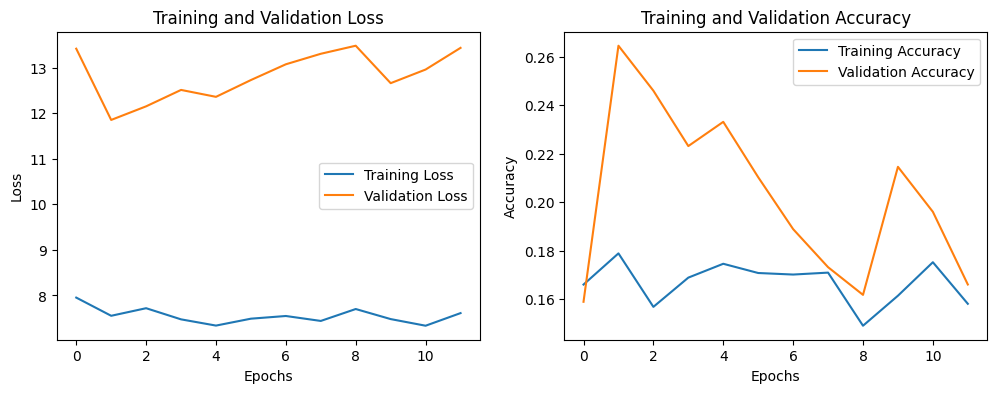

55/55 [==============================] - 13s 233ms/step - loss: 13.2316 - accuracy: 0.1786
Test Loss: 13.231558799743652
Test Accuracy: 0.17859187722206116


In [ ]:
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=12,
                    batch_size=32,
                    validation_data=(np.array(X_val), np.array(y_val)),
                    verbose=1)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0